In [160]:
import pandas as pd
import numpy as np

df=pd.read_csv('mnist_train.csv')
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df.shape

(60000, 785)

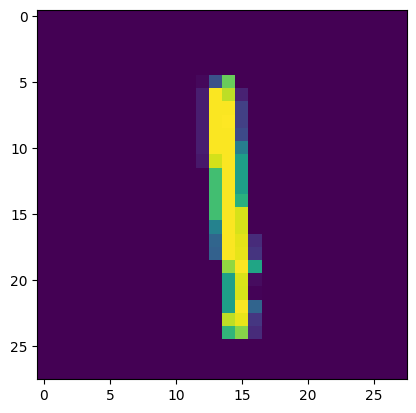

In [144]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[8,1:].values.reshape(28,28))

In [162]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [163]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape

(48000, 784)

In [164]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [165]:
y_pred=knn.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9715

In [167]:
#PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [168]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [169]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [170]:
X_train.shape

(48000, 784)

In [171]:
knn=KNeighborsClassifier()

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)

0.9458333333333333

In [125]:
X_train = np.array(X_train)
X_test = np.array(X_test)

max_components = min(X_train.shape[0], X_train.shape[1])  # Limit to min(samples, features)

for i in range(1, max_components + 1):  # Adjust upper limit
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier()  # Default k=5
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    print(f"PCA Components: {i}, Accuracy: {acc:.4f}")

PCA Components: 1, Accuracy: 0.2628
PCA Components: 2, Accuracy: 0.3164
PCA Components: 3, Accuracy: 0.5074
PCA Components: 4, Accuracy: 0.6633
PCA Components: 5, Accuracy: 0.7406
PCA Components: 6, Accuracy: 0.8254
PCA Components: 7, Accuracy: 0.8383
PCA Components: 8, Accuracy: 0.8724
PCA Components: 9, Accuracy: 0.8848
PCA Components: 10, Accuracy: 0.9083
PCA Components: 11, Accuracy: 0.9154
PCA Components: 12, Accuracy: 0.9197
PCA Components: 13, Accuracy: 0.9273
PCA Components: 14, Accuracy: 0.9359
PCA Components: 15, Accuracy: 0.9404
PCA Components: 16, Accuracy: 0.9422
PCA Components: 17, Accuracy: 0.9429
PCA Components: 18, Accuracy: 0.9443
PCA Components: 19, Accuracy: 0.9475
PCA Components: 20, Accuracy: 0.9502
PCA Components: 21, Accuracy: 0.9499
PCA Components: 22, Accuracy: 0.9494
PCA Components: 23, Accuracy: 0.9516
PCA Components: 24, Accuracy: 0.9528
PCA Components: 25, Accuracy: 0.9535
PCA Components: 26, Accuracy: 0.9538
PCA Components: 27, Accuracy: 0.9545
PCA Compon

In [172]:
pca=PCA(n_components=3)

X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

X_train_trf

array([[ -0.04285026,  -1.92217345,  -2.50233661],
       [  8.15958855,  -4.4961712 ,  -4.74209866],
       [ -7.50488223,  -3.71910867,   5.1366242 ],
       ...,
       [ 10.27732442,  -9.28652151,  -1.82594462],
       [ 10.29728947, -12.41274533,   3.29437629],
       [ -2.87743198,  -0.81213933,  -1.447647  ]], shape=(48000, 3))

In [173]:
import plotly.express as px
import nbformat
print(nbformat.__version__)
import plotly.io as pio
pio.renderers.default = "browser"




y_train_trf=y_train.astype(str)

fig=px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10)

fig.show()


5.10.4


In [174]:
pca.explained_variance_

array([40.65780534, 29.35286734, 26.72542354])

In [175]:
pca.components_.shape

(3, 784)

In [177]:
pca.explained_variance_ratio_

array([0.05702238, 0.04116726, 0.03748228])

In [178]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [180]:
pca.explained_variance_.shape

(784,)

In [182]:
pca.components_

array([[ 1.00000000e+00,  1.25837221e-15,  1.34155119e-15, ...,
        -7.05827165e-18,  2.58200424e-17,  4.14213088e-17],
       [-1.25837221e-15,  1.00000000e+00, -7.88258347e-15, ...,
         1.76585361e-18, -2.30107343e-17, -1.87359223e-17],
       [-1.34155119e-15,  8.65973959e-15,  1.00000000e+00, ...,
        -2.06779298e-17,  8.71025827e-17,  8.48307650e-17],
       ...,
       [ 2.57579952e-32, -7.26711125e-17, -2.12804864e-17, ...,
         2.17398223e-02,  7.38147965e-03,  5.36701902e-02],
       [ 2.37979672e-24,  6.60718732e-17, -3.44878398e-18, ...,
        -1.24163635e-02, -4.17655207e-02,  2.76125753e-02],
       [ 3.42305871e-16,  1.11022302e-16,  2.22044605e-16, ...,
         2.06197798e-02, -7.54297382e-02, -1.21006715e-01]],
      shape=(784, 784))

In [184]:
pca.explained_variance_ratio_

array([5.70223819e-02, 4.11672592e-02, 3.74822816e-02, 2.90261081e-02,
       2.52770908e-02, 2.20430380e-02, 1.94366666e-02, 1.75441305e-02,
       1.54921137e-02, 1.40861433e-02, 1.34589075e-02, 1.21529957e-02,
       1.12251067e-02, 1.10229177e-02, 1.03419090e-02, 1.00206787e-02,
       9.48683702e-03, 9.24555612e-03, 8.96926898e-03, 8.75521045e-03,
       8.39827016e-03, 8.12418892e-03, 7.68547028e-03, 7.46772523e-03,
       7.20298951e-03, 6.93679776e-03, 6.87722142e-03, 6.64164642e-03,
       6.33750495e-03, 6.16945026e-03, 6.04647249e-03, 5.91711121e-03,
       5.73069428e-03, 5.69680239e-03, 5.60809719e-03, 5.39451157e-03,
       5.35154796e-03, 5.23852071e-03, 5.13788933e-03, 4.84055149e-03,
       4.80231470e-03, 4.74998968e-03, 4.61497113e-03, 4.53430150e-03,
       4.48156242e-03, 4.45447620e-03, 4.39100610e-03, 4.35714985e-03,
       4.30642104e-03, 4.15776517e-03, 4.12354481e-03, 4.07518207e-03,
       4.00265779e-03, 3.95008048e-03, 3.89783449e-03, 3.85638695e-03,
      

In [185]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05702238, 0.09818964, 0.13567192, 0.16469803, 0.18997512,
       0.21201816, 0.23145483, 0.24899896, 0.26449107, 0.27857721,
       0.29203612, 0.30418912, 0.31541422, 0.32643714, 0.33677905,
       0.34679973, 0.35628657, 0.36553212, 0.37450139, 0.3832566 ,
       0.39165487, 0.39977906, 0.40746453, 0.41493226, 0.42213525,
       0.42907204, 0.43594926, 0.44259091, 0.44892842, 0.45509787,
       0.46114434, 0.46706145, 0.47279214, 0.47848895, 0.48409704,
       0.48949156, 0.4948431 , 0.50008162, 0.50521951, 0.51006006,
       0.51486238, 0.51961237, 0.52422734, 0.52876164, 0.5332432 ,
       0.53769768, 0.54208869, 0.54644584, 0.55075226, 0.55491002,
       0.55903357, 0.56310875, 0.56711141, 0.57106149, 0.57495932,
       0.57881571, 0.58255742, 0.58627309, 0.58991977, 0.59351945,
       0.59709068, 0.60059041, 0.60404334, 0.60748518, 0.61090121,
       0.61426725, 0.61761329, 0.62090554, 0.62413045, 0.62730982,
       0.63046295, 0.63359184, 0.63668903, 0.6397278 , 0.64275

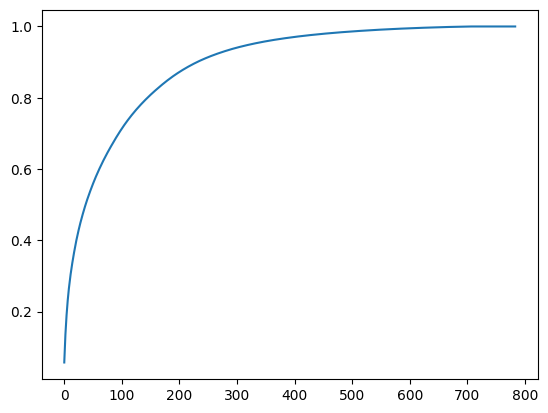

In [186]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))